# Description of Variables analysed:

* **avg_volume_pre**: quantitative variable with the avg volume of all candles previous to IC
* **volume_pre_[m1,ic]**: volume for IC-1,IC
* **volume_post_[ic,p1]**: volume for IC,IC+1
* **ICdiffm1_wh**: Difference between high of IC and IC-1
* **ICdiffm1_wl**: Difference between low of IC and IC-1
* **p1diffIC_wh**: Difference between high of IC+1 and IC
* **p1diffIC_wl**: Difference between low of IC+1 and IC
* **ICdiffm1_ch**: Difference between candle's high between IC and IC-1
* **ICdiffm1_cl**: Difference between candle's low between IC and IC-1
* **p1diffIC_ch**: Difference between candle's high between IC+1 and IC
* **p1diffIC_cl**: Difference between candle's low between IC+1 and IC

First thing is to read in the data.frame:

In [310]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style="whitegrid")

df = pd.read_csv("/Users/ernesto/projects/FOREX/out.txt",sep='\t',index_col=False)


Also, the number of records per instrument:

In [311]:
my_tab = pd.crosstab(index=df['instrument'], columns="count")
print my_tab

col_0       count
instrument       
AUD_USD        33
EUR_USD        35
USD_CAD        14


Then, we check the proportions of successful outcomes per instrument: 

In [312]:
print pd.crosstab(df['outcome'], df['instrument']).apply(lambda r: r/r.sum(), axis=0)

instrument   AUD_USD   EUR_USD   USD_CAD
outcome                                 
False       0.606061  0.485714  0.571429
True        0.393939  0.514286  0.428571


Now, we check the proportions of successful outcomes per granularity:

In [313]:
print pd.crosstab(df['outcome'], df['granularity']).apply(lambda r: r/r.sum(), axis=0)

granularity    D       H12        H8
outcome                             
False        0.5  0.555556  0.555556
True         0.5  0.444444  0.444444


Conclusion:
As expected, the proportion of successes is higher for the Daily timeframe

Now, we are going to examine each of the independent variables separately with relation to the outcome

# IC+1 candle's color
This variable is categorical (dicotomic).
Firstly, we will add a new column to the dataframe named 'p1_flow' that will have 2 values 'CC' or 'TC' meaning 'countercurrent' or 'towardscurrent' depending on the candle colour being green/red when the reversal is bullish/bearish

In [314]:
p1_flow=[]
for index, row in df.iterrows():
    c=row['colors_post_[ic,p1]'].split(',')[1]
    if (row['type']=='bullish' and c=='green') or (row['type']=='bearish' and c=='red'):
        p1_flow.append('TC')
    elif (row['type']=='bullish' and c=='red') or (row['type']=='bearish' and c=='green'):
        p1_flow.append('CC')

df['p1_flow']=p1_flow

Then, we check the proportion of succeses/failures for each p1_flow value:

In [315]:
print pd.crosstab(df['outcome'], df['p1_flow']).apply(lambda r: r/r.sum(), axis=0)

p1_flow        CC        TC
outcome                    
False    0.628571  0.489362
True     0.371429  0.510638


Conclusion:
As expected, the proportion of success is larger when p1_flow is TC

# IC-1 candle's color

This variable is categorical (dicotomic).The procedure is quite similar to the one explained in the previous section

In [316]:
m1_flow=[]
for index, row in df.iterrows():
    c=row['colors_pre_[m1,ic]'].split(',')[0]
    if (row['type']=='bullish' and c=='red') or (row['type']=='bearish' and c=='green'):
        m1_flow.append('TC')
    elif (row['type']=='bullish' and c=='green') or (row['type']=='bearish' and c=='red'):
        m1_flow.append('CC')

df['m1_flow']=m1_flow

Then, we check the proportion of succeses/failures for each m1_flow value:

In [317]:
print pd.crosstab(df['outcome'], df['m1_flow']).apply(lambda r: r/r.sum(), axis=0)

m1_flow   CC    TC
outcome           
False    0.5  0.55
True     0.5  0.45


**Conclusion:**
There is not relationship between IC-1 candle's color and proportion of successes

# IC+1 High/Low differential
These are 4 quantitative independent variables. They represent the difference between the high/low from the wick/candle of the IC+1 candle and IC

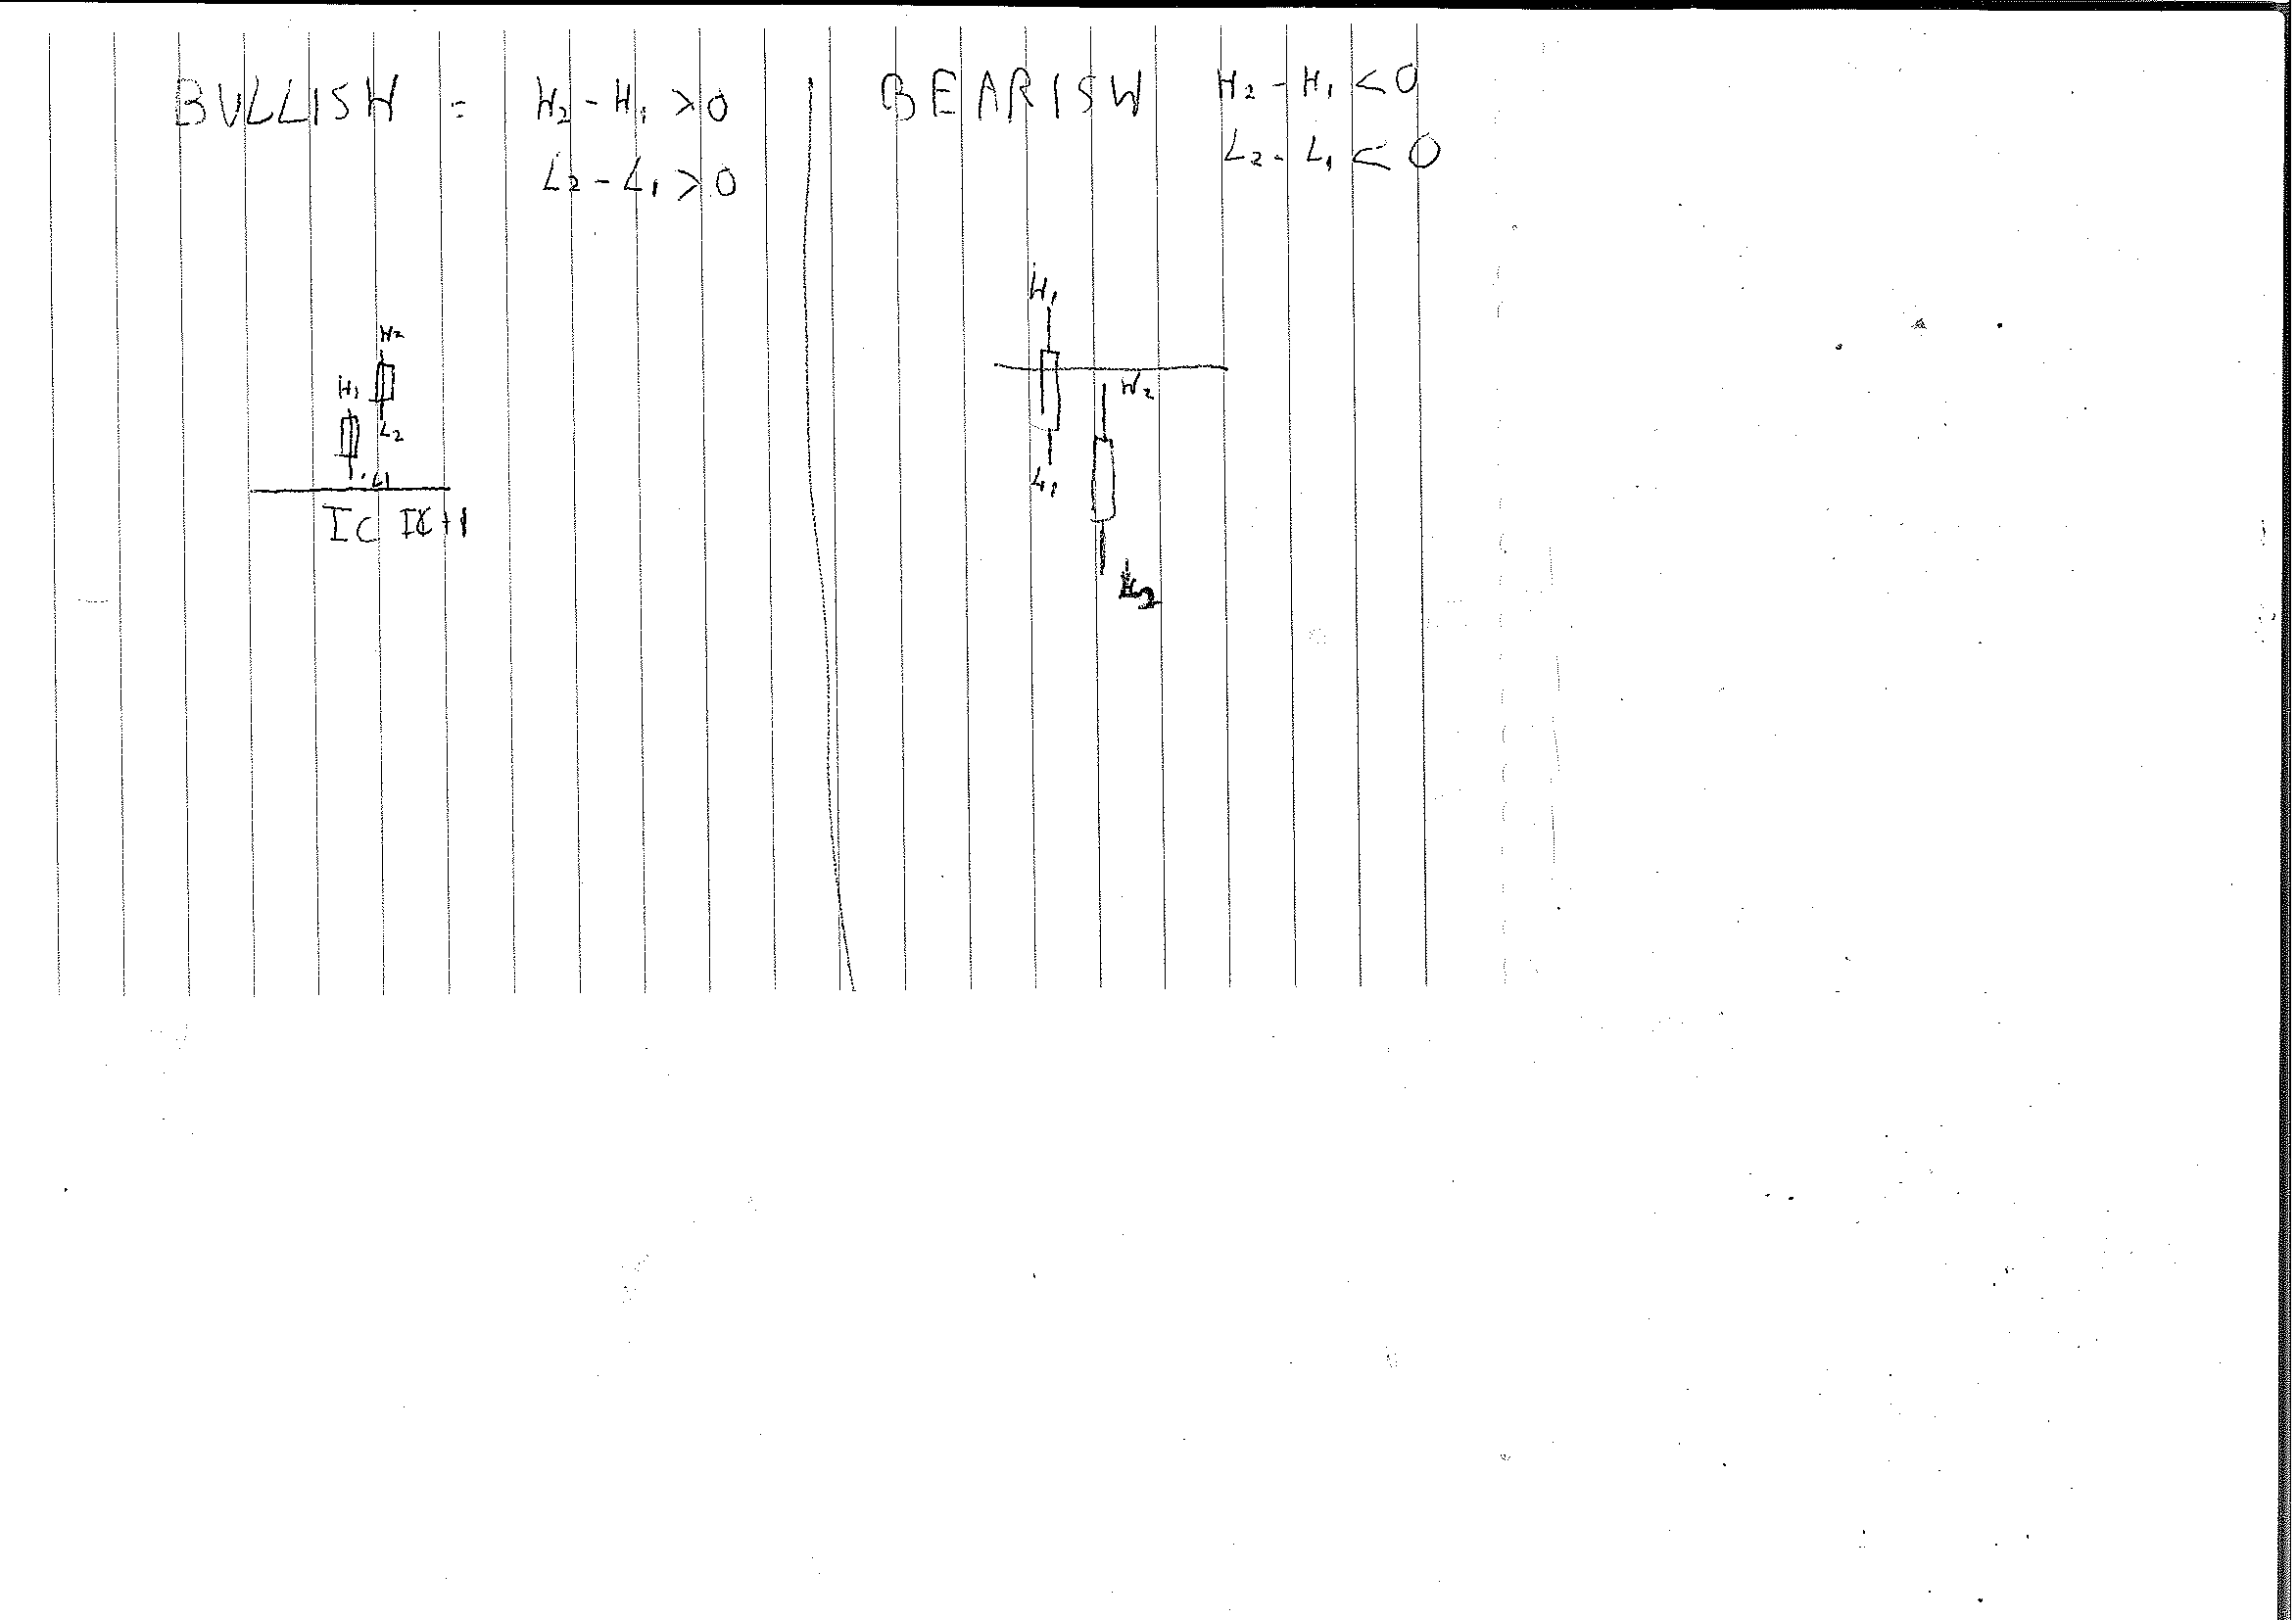

In [318]:
from IPython.display import Image
Image("/Users/ernesto/Desktop/20170301124551634.png")

## Bullish
### diffp1_u:
#### Wicks

Avg diff for True set: 0.000814
Avg diff for False set: 0.000727


Ttest_indResult(statistic=0.20246190715999629, pvalue=0.84045503477158712)

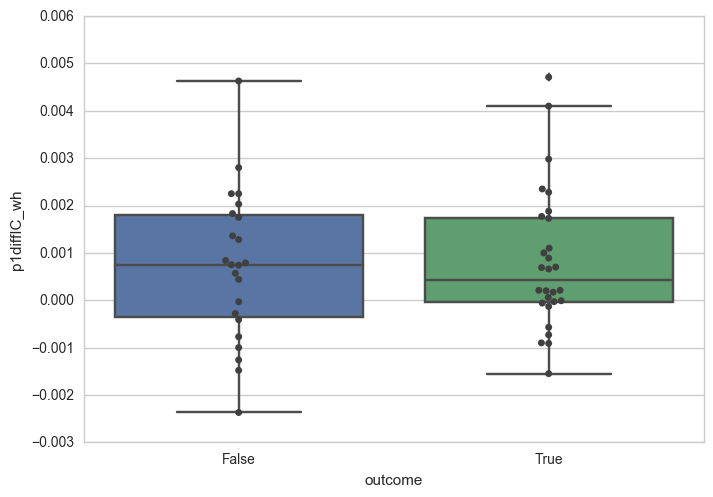

In [319]:
df_bullish=df.loc[df['type'] == 'bullish']
ax = sns.boxplot(x="outcome", y="p1diffIC_wh", data=df_bullish)
ax = sns.swarmplot(x="outcome", y="p1diffIC_wh", data=df_bullish, color=".25")

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
true_p1diffIC_wh=df_bullish.loc[df_bullish['outcome'] == True,'p1diffIC_wh']
false_p1diffIC_wh=df_bullish.loc[df_bullish['outcome'] == False,'p1diffIC_wh']
print("Avg diff for True set: %f" % true_p1diffIC_wh.mean())
print("Avg diff for False set: %f" % false_p1diffIC_wh.mean())
#performing paired t-test
stats.ttest_ind(a= true_p1diffIC_wh,b= false_p1diffIC_wh,equal_var=False) 


### diffp1_l:
#### Wicks

Avg diff for True set: 0.002534
Avg diff for False set: 0.000563


Ttest_indResult(statistic=3.5809311339209575, pvalue=0.00087327061837040316)

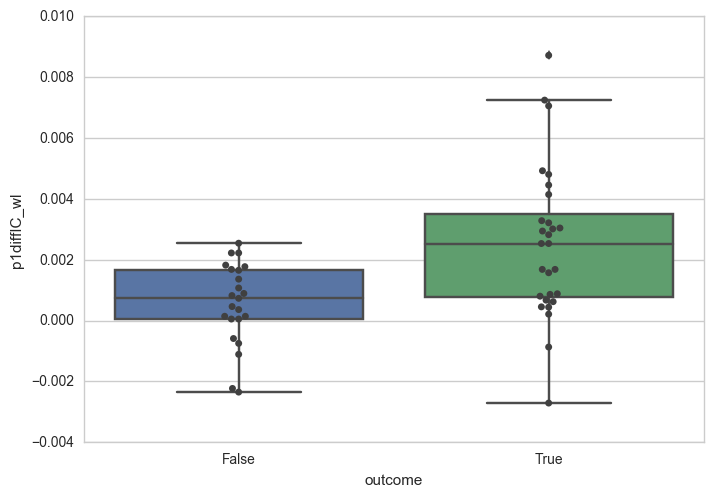

In [320]:
ax = sns.boxplot(x="outcome", y="p1diffIC_wl", data=df_bullish)
ax = sns.swarmplot(x="outcome", y="p1diffIC_wl", data=df_bullish, color=".25")

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
true_p1diffIC_wl=df_bullish.loc[df_bullish['outcome'] == True,'p1diffIC_wl']
false_p1diffIC_wl=df_bullish.loc[df_bullish['outcome'] == False,'p1diffIC_wl']
print("Avg diff for True set: %f" % true_p1diffIC_wl.mean())
print("Avg diff for False set: %f" % false_p1diffIC_wl.mean())
#performing paired t-test
stats.ttest_ind(a= true_p1diffIC_wl,b= false_p1diffIC_wl,equal_var=False) 


### Conclusions
**Conclusion1** For Bulllish entries, it seems that there is no correlation between p1_u differential with IC and the outcome being successful. The difference with respect to the high of the candles is non significative (P=0.8404)

**Conclusion2** For Bullish entries, it seems that there is correlation between p1_l differential with IC and the outcome being successful.The difference with respect to the high of the candles is significative (P=0.0009)

### diffp1_u:
#### Candles

Avg diff for True set: 0.002357
Avg diff for False set: 0.001237


Ttest_indResult(statistic=2.0247937352018073, pvalue=0.048530301305853445)

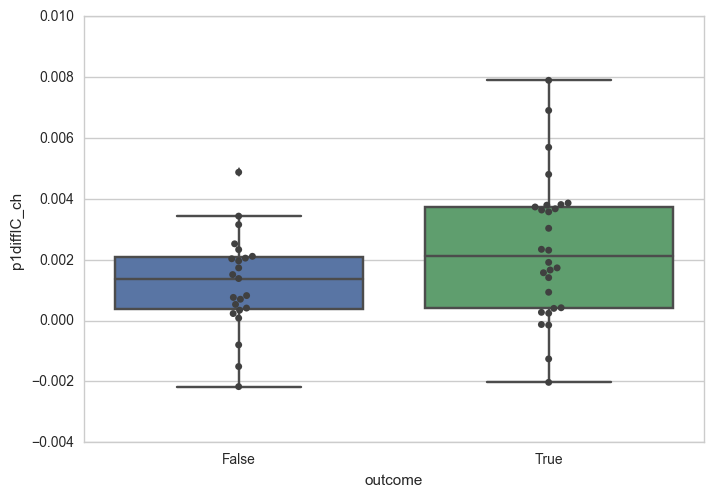

In [321]:
ax = sns.boxplot(x="outcome", y="p1diffIC_ch", data=df_bullish)
ax = sns.swarmplot(x="outcome", y="p1diffIC_ch", data=df_bullish, color=".25")

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
true_p1diffIC_ch=df_bullish.loc[df_bullish['outcome'] == True,'p1diffIC_ch']
false_p1diffIC_ch=df_bullish.loc[df_bullish['outcome'] == False,'p1diffIC_ch']
print("Avg diff for True set: %f" % true_p1diffIC_ch.mean())
print("Avg diff for False set: %f" % false_p1diffIC_ch.mean())
#performing paired t-test
stats.ttest_ind(a= true_p1diffIC_ch,b=false_p1diffIC_ch,equal_var=False) 


### diffp1_l:
#### Candles

Avg diff for True set: 0.000172
Avg diff for False set: 0.000032


Ttest_indResult(statistic=0.20793954786042929, pvalue=0.83627484780172257)

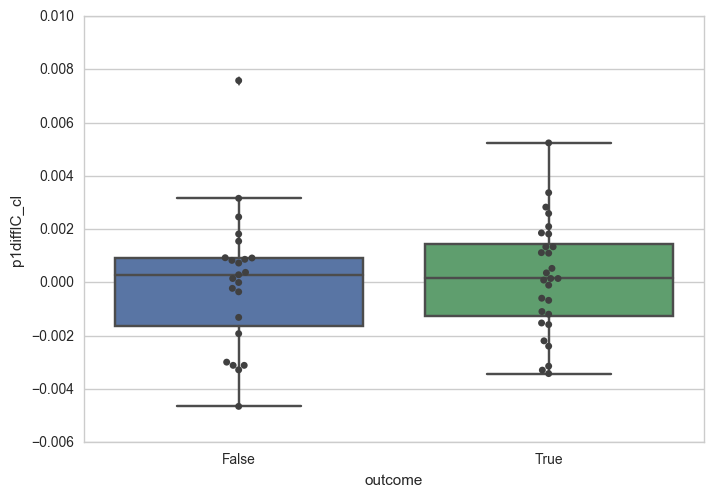

In [322]:
ax = sns.boxplot(x="outcome", y="p1diffIC_cl", data=df_bullish)
ax = sns.swarmplot(x="outcome", y="p1diffIC_cl", data=df_bullish, color=".25")

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
true_p1diffIC_cl=df_bullish.loc[df_bullish['outcome'] == True,'p1diffIC_cl']
false_p1diffIC_cl=df_bullish.loc[df_bullish['outcome'] == False,'p1diffIC_cl']
print("Avg diff for True set: %f" % true_p1diffIC_cl.mean())
print("Avg diff for False set: %f" % false_p1diffIC_cl.mean())
#performing paired t-test
stats.ttest_ind(a= true_p1diffIC_cl,b=false_p1diffIC_cl,equal_var=False) 

### Conclusions
**Conclusion1** For Bulllish entries, it seems that there is a weak correlation between p1_u differential with IC and the outcome being successful. The difference with respect to the closing price of the candles is significative (P=0.0485)

**Conclusion2** For Bullish entries, it seems that there no correlation between p1_l differential with IC and the outcome being successful.
The difference with respect to the closing price of the candles is non significative (0.8363)

## Bearish
### diffp1_u:
#### Wicks

Avg diff for True set: -0.003809
Avg diff for False set: 0.000551


Ttest_indResult(statistic=-2.6693669078750393, pvalue=0.020937744994128902)

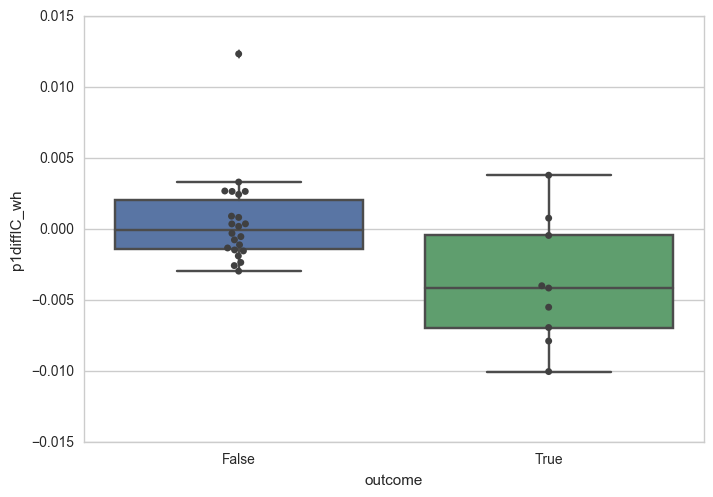

In [323]:
df_bearish=df.loc[df['type'] == 'bearish']

ax = sns.boxplot(x="outcome", y="p1diffIC_wh", data=df_bearish)
ax = sns.swarmplot(x="outcome", y="p1diffIC_wh", data=df_bearish, color=".25")

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
true_p1diffIC_wh=df_bearish.loc[df_bearish['outcome'] == True,'p1diffIC_wh']
false_p1diffIC_wh=df_bearish.loc[df_bearish['outcome'] == False,'p1diffIC_wh']
print("Avg diff for True set: %f" % true_p1diffIC_wh.mean())
print("Avg diff for False set: %f" % false_p1diffIC_wh.mean())
#performing paired t-test
stats.ttest_ind(a= true_p1diffIC_wh,b= false_p1diffIC_wh,equal_var=False) 

### diffp1_l:
#### Wicks

Avg diff for True set: -0.001500
Avg diff for False set: -0.000037


Ttest_indResult(statistic=-2.0782104750841248, pvalue=0.056666736848667999)

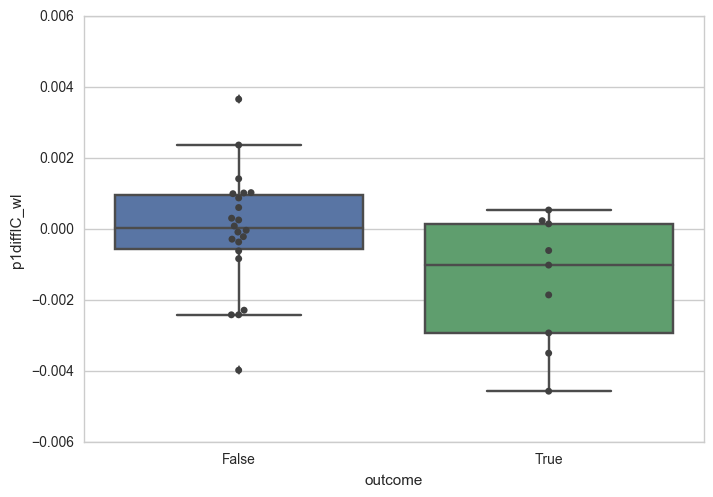

In [324]:
ax = sns.boxplot(x="outcome", y="p1diffIC_wl", data=df_bearish)
ax = sns.swarmplot(x="outcome", y="p1diffIC_wl", data=df_bearish, color=".25")

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
true_p1diffIC_wl=df_bearish.loc[df_bearish['outcome'] == True,'p1diffIC_wl']
false_p1diffIC_wl=df_bearish.loc[df_bearish['outcome'] == False,'p1diffIC_wl']
print("Avg diff for True set: %f" % true_p1diffIC_wl.mean())
print("Avg diff for False set: %f" % false_p1diffIC_wl.mean())
#performing paired t-test
stats.ttest_ind(a= true_p1diffIC_wl,b= false_p1diffIC_wl,equal_var=False) 

### Conclusions
**Conclusion1** For Bearish entries, it seems that there is a significative correlation (P=0.0209) between p1_u wick differential with IC and the outcome being successful.
**Conclusion2** For Bearish entries, it seems that there no correlation (P=0.0567) between p1_l wick differential with IC and the outcome being successful.

### diffp1_u:
#### Candles

Avg diff for True set: -0.003730
Avg diff for False set: -0.001280


Ttest_indResult(statistic=-2.0328415646521987, pvalue=0.070590667308144756)

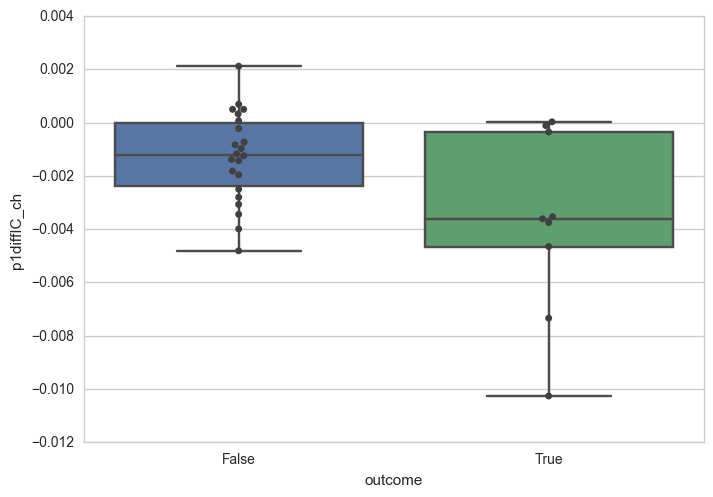

In [325]:
ax = sns.boxplot(x="outcome", y="p1diffIC_ch", data=df_bearish)
ax = sns.swarmplot(x="outcome", y="p1diffIC_ch", data=df_bearish, color=".25")

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
true_p1diffIC_ch=df_bearish.loc[df_bearish['outcome'] == True,'p1diffIC_ch']
false_p1diffIC_ch=df_bearish.loc[df_bearish['outcome'] == False,'p1diffIC_ch']
print("Avg diff for True set: %f" % true_p1diffIC_ch.mean())
print("Avg diff for False set: %f" % false_p1diffIC_ch.mean())
#performing paired t-test
stats.ttest_ind(a= true_p1diffIC_ch,b= false_p1diffIC_ch,equal_var=False) 

### diffp1_l:
#### Candles:

Avg diff for True set: -0.001668
Avg diff for False set: 0.000318


Ttest_indResult(statistic=-2.0569077422282938, pvalue=0.050234540324949561)

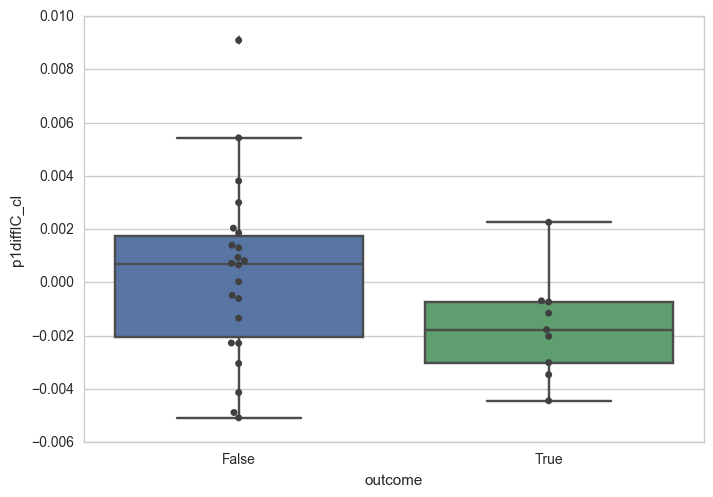

In [326]:
ax = sns.boxplot(x="outcome", y="p1diffIC_cl", data=df_bearish)
ax = sns.swarmplot(x="outcome", y="p1diffIC_cl", data=df_bearish, color=".25")

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
true_p1diffIC_cl=df_bearish.loc[df_bearish['outcome'] == True,'p1diffIC_cl']
false_p1diffIC_cl=df_bearish.loc[df_bearish['outcome'] == False,'p1diffIC_cl']
print("Avg diff for True set: %f" % true_p1diffIC_cl.mean())
print("Avg diff for False set: %f" % false_p1diffIC_cl.mean())
#performing paired t-test
stats.ttest_ind(a= true_p1diffIC_cl,b= false_p1diffIC_cl,equal_var=False) 

### Conclusions
**Conclusion1** For Bearish entries, it seems that there is not significative correlation (P=0.0705) between p1_u candle differential with IC and the outcome being successful.
**Conclusion2** For Bearish entries, it seems that there is no correlation (P=0.0502) between p1_l candle differential with IC and the outcome being successful.

# IC-1 High/Low differential
These are 4 quantitative independent variables. They represent the difference between the high/low from the wick/candle of the IC-1 candle and IC

## Bullish
### ICdiffm1_u
####  wicks

Avg diff for True set: -0.002989
Avg diff for False set: -0.003155


Ttest_indResult(statistic=0.13721164471717151, pvalue=0.89142653647752701)

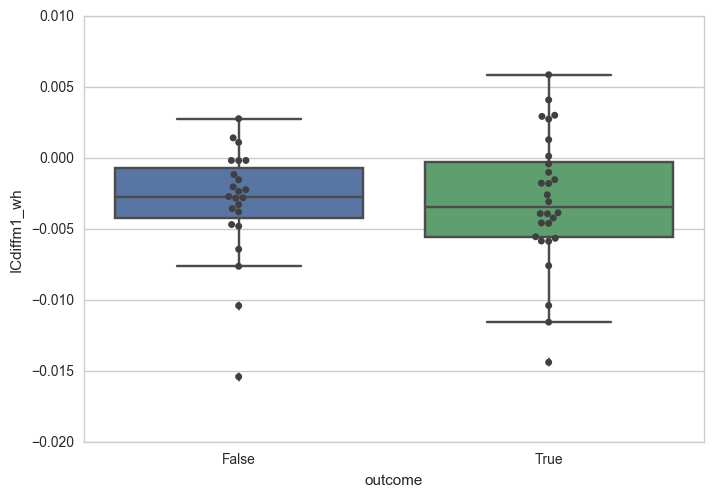

In [327]:
ax = sns.boxplot(x="outcome", y="ICdiffm1_wh", data=df_bullish)
ax = sns.swarmplot(x="outcome", y="ICdiffm1_wh", data=df_bullish, color=".25")

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
true_ICdiffm1_wh=df_bullish.loc[df_bullish['outcome'] == True,'ICdiffm1_wh']
false_ICdiffm1_wh=df_bullish.loc[df_bullish['outcome'] == False,'ICdiffm1_wh']
print("Avg diff for True set: %f" % true_ICdiffm1_wh.mean())
print("Avg diff for False set: %f" % false_ICdiffm1_wh.mean())
#performing paired t-test
stats.ttest_ind(a= true_ICdiffm1_wh,b= false_ICdiffm1_wh,equal_var=False) 

### ICdiffm1_l 
#### wicks

Avg diff for True set: -0.000605
Avg diff for False set: -0.000762


Ttest_indResult(statistic=0.30910724177853771, pvalue=0.75859713040065824)

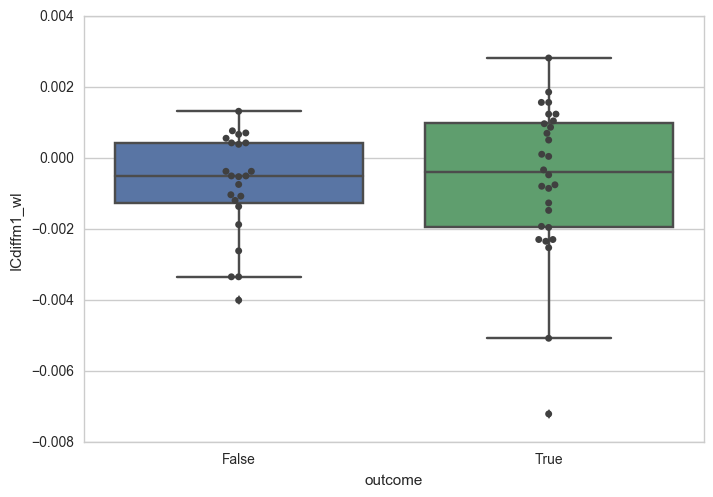

In [328]:
ax = sns.boxplot(x="outcome", y="ICdiffm1_wl", data=df_bullish)
ax = sns.swarmplot(x="outcome", y="ICdiffm1_wl", data=df_bullish, color=".25")

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
true_ICdiffm1_wl=df_bullish.loc[df_bullish['outcome'] == True,'ICdiffm1_wl']
false_ICdiffm1_wl=df_bullish.loc[df_bullish['outcome'] == False,'ICdiffm1_wl']
print("Avg diff for True set: %f" % true_ICdiffm1_wl.mean())
print("Avg diff for False set: %f" % false_ICdiffm1_wl.mean())
#performing paired t-test
stats.ttest_ind(a= true_ICdiffm1_wl,b= false_ICdiffm1_wl,equal_var=False) 

### Conclusions
**Conclusion1** For Bullish entries, it seems that there is not significative correlation (P=0.8914) between m1_u wick differential with IC and the outcome being successful.
**Conclusion2** For Bullish entries, it seems that there is no correlation (P=0.7586) between m1_l wick differential with IC and the outcome being successful.

### ICdiffm1_u 
#### candles

Avg diff for True set: -0.005482
Avg diff for False set: -0.004507


Ttest_indResult(statistic=-0.87566619131858769, pvalue=0.38548812763255502)

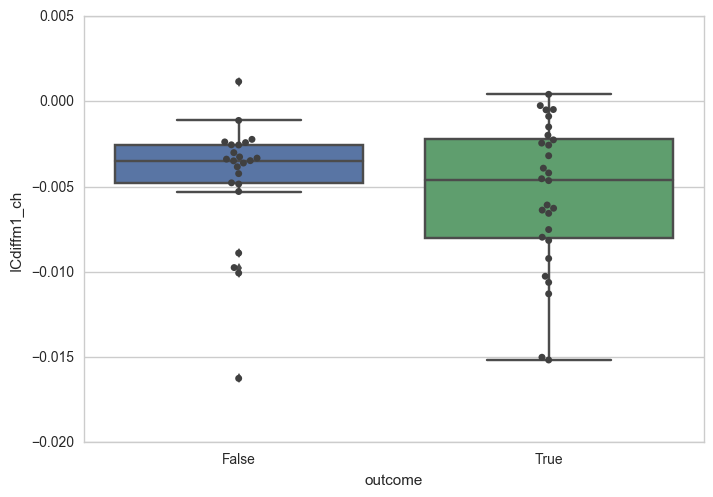

In [329]:
ax = sns.boxplot(x="outcome", y="ICdiffm1_ch", data=df_bullish)
ax = sns.swarmplot(x="outcome", y="ICdiffm1_ch", data=df_bullish, color=".25")

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
true_ICdiffm1_ch=df_bullish.loc[df_bullish['outcome'] == True,'ICdiffm1_ch']
false_ICdiffm1_ch=df_bullish.loc[df_bullish['outcome'] == False,'ICdiffm1_ch']
print("Avg diff for True set: %f" % true_ICdiffm1_ch.mean())
print("Avg diff for False set: %f" % false_ICdiffm1_ch.mean())
#performing paired t-test
stats.ttest_ind(a= true_ICdiffm1_ch,b= false_ICdiffm1_ch,equal_var=False) 

### ICdiffm1_l 
#### candles

Avg diff for True set: 0.002356
Avg diff for False set: 0.001201


Ttest_indResult(statistic=2.1264985320890966, pvalue=0.038628388215716493)

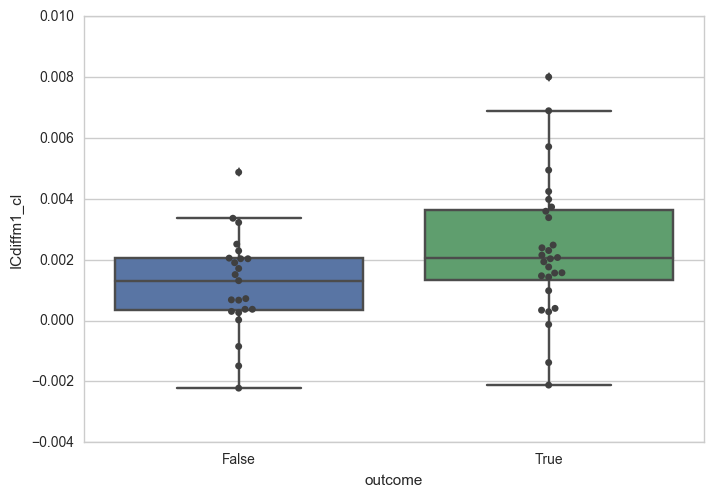

In [330]:
ax = sns.boxplot(x="outcome", y="ICdiffm1_cl", data=df_bullish)
ax = sns.swarmplot(x="outcome", y="ICdiffm1_cl", data=df_bullish, color=".25")

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
true_ICdiffm1_cl=df_bullish.loc[df_bullish['outcome'] == True,'ICdiffm1_cl']
false_ICdiffm1_cl=df_bullish.loc[df_bullish['outcome'] == False,'ICdiffm1_cl']
print("Avg diff for True set: %f" % true_ICdiffm1_cl.mean())
print("Avg diff for False set: %f" % false_ICdiffm1_cl.mean())
#performing paired t-test
stats.ttest_ind(a= true_ICdiffm1_cl,b= false_ICdiffm1_cl,equal_var=False) 

### Conclusions
**Conclusion1** For Bullish entries, it seems that there is not significative correlation (P=0.3855) between m1_u candle differential with IC and the outcome being successful.
**Conclusion2** For Bullish entries, it seems that there is significative correlation (P=0.0386) between m1_l candle differential with IC and the outcome being successful.

## Bearish
### ICdiffm1_u 
#### wicks

Avg diff for True set: -0.000073
Avg diff for False set: 0.000135


Ttest_indResult(statistic=-0.35944582678791753, pvalue=0.7249070586077504)

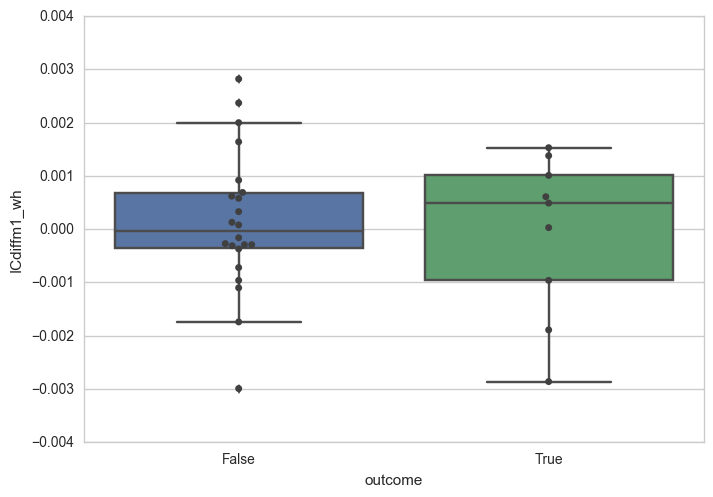

In [331]:
ax = sns.boxplot(x="outcome", y="ICdiffm1_wh", data=df_bearish)
ax = sns.swarmplot(x="outcome", y="ICdiffm1_wh", data=df_bearish, color=".25")

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
true_ICdiffm1_wh=df_bearish.loc[df_bearish['outcome'] == True,'ICdiffm1_wh']
false_ICdiffm1_wh=df_bearish.loc[df_bearish['outcome'] == False,'ICdiffm1_wh']
print("Avg diff for True set: %f" % true_ICdiffm1_wh.mean())
print("Avg diff for False set: %f" % false_ICdiffm1_wh.mean())
#performing paired t-test
stats.ttest_ind(a= true_ICdiffm1_wh,b= false_ICdiffm1_wh,equal_var=False) 

### ICdiffm1_l 
#### wicks

Avg diff for True set: 0.000239
Avg diff for False set: 0.002917


Ttest_indResult(statistic=-1.4114611650306068, pvalue=0.18425082584235636)

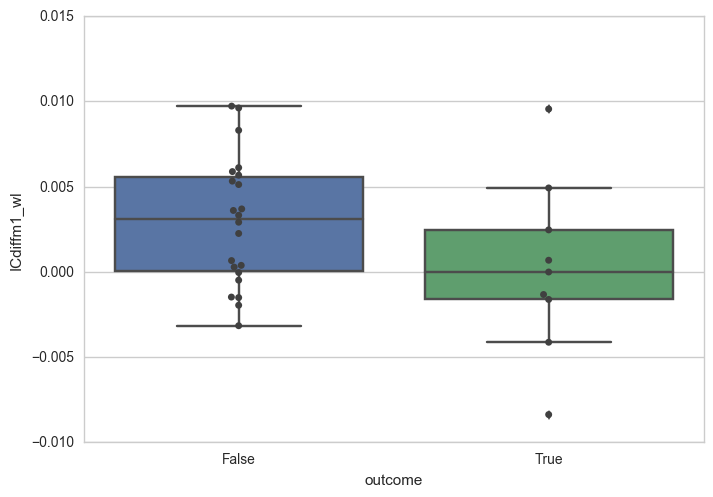

In [332]:
ax = sns.boxplot(x="outcome", y="ICdiffm1_wl", data=df_bearish)
ax = sns.swarmplot(x="outcome", y="ICdiffm1_wl", data=df_bearish, color=".25")

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
true_ICdiffm1_wl=df_bearish.loc[df_bearish['outcome'] == True,'ICdiffm1_wl']
false_ICdiffm1_wl=df_bearish.loc[df_bearish['outcome'] == False,'ICdiffm1_wl']
print("Avg diff for True set: %f" % true_ICdiffm1_wl.mean())
print("Avg diff for False set: %f" % false_ICdiffm1_wl.mean())
#performing paired t-test
stats.ttest_ind(a= true_ICdiffm1_wl,b= false_ICdiffm1_wl,equal_var=False)


### Conclusions
**Conclusion1** For Bearish entries, it seems that there is not significative correlation (P=0.7249) between m1_u wick differential with IC and the outcome being successful.
**Conclusion2** For Bearish entries, it seems that there is not significative correlation (P=0.1842) between m1_l wick differential with IC and the outcome being successful.

### ICdiffm1_u
#### candles

Avg diff for True set: 0.004388
Avg diff for False set: 0.005037


Ttest_indResult(statistic=-0.46181937981737253, pvalue=0.65178141691803915)

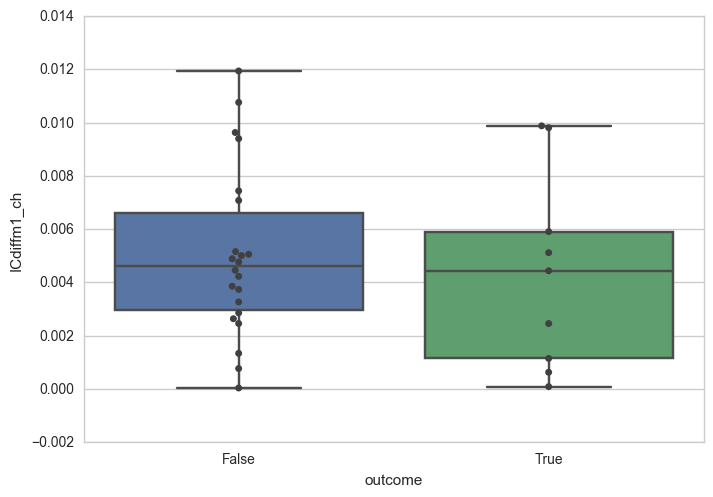

In [333]:
ax = sns.boxplot(x="outcome", y="ICdiffm1_ch", data=df_bearish)
ax = sns.swarmplot(x="outcome", y="ICdiffm1_ch", data=df_bearish, color=".25")

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
true_ICdiffm1_ch=df_bearish.loc[df_bearish['outcome'] == True,'ICdiffm1_ch']
false_ICdiffm1_ch=df_bearish.loc[df_bearish['outcome'] == False,'ICdiffm1_ch']
print("Avg diff for True set: %f" % true_ICdiffm1_ch.mean())
print("Avg diff for False set: %f" % false_ICdiffm1_ch.mean())
#performing paired t-test
stats.ttest_ind(a= true_ICdiffm1_ch,b= false_ICdiffm1_ch,equal_var=False)

### ICdiffm1_l
#### candles

Avg diff for True set: -0.003667
Avg diff for False set: -0.001931


Ttest_indResult(statistic=-1.4553507495585729, pvalue=0.17800083809149433)

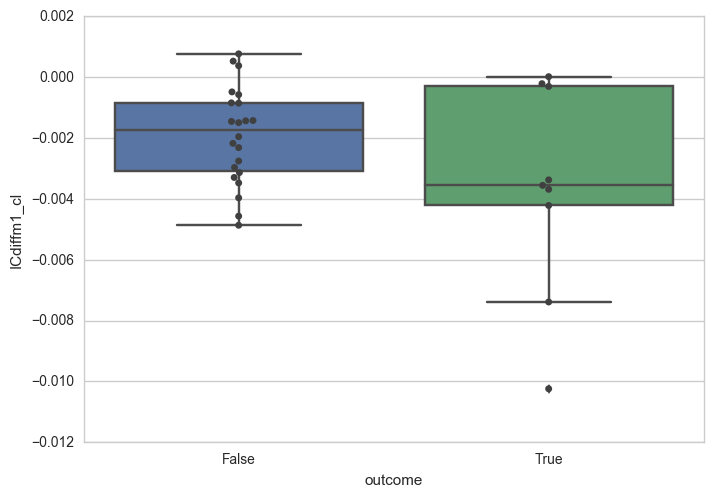

In [334]:
ax = sns.boxplot(x="outcome", y="ICdiffm1_cl", data=df_bearish)
ax = sns.swarmplot(x="outcome", y="ICdiffm1_cl", data=df_bearish, color=".25")

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
true_ICdiffm1_cl=df_bearish.loc[df_bearish['outcome'] == True,'ICdiffm1_cl']
false_ICdiffm1_cl=df_bearish.loc[df_bearish['outcome'] == False,'ICdiffm1_cl']
print("Avg diff for True set: %f" % true_ICdiffm1_cl.mean())
print("Avg diff for False set: %f" % false_ICdiffm1_cl.mean())
#performing paired t-test
stats.ttest_ind(a= true_ICdiffm1_cl,b= false_ICdiffm1_cl,equal_var=False)

### Conclusions
**Conclusion1** For Bearish entries, it seems that there is not significative correlation (P=0.6518) between m1_u candle differential with IC and the outcome being successful.
**Conclusion2** For Bearish entries, it seems that there is not significative correlation (P=0.1780) between m1_l candle differential with IC and the outcome being successful.

# IC+1 upper wick, body, lower wick
In this section, I will examine the % of the +1 candle corresponding to upper_wick,candle,lower_wick
The analysis will be done, separately for the bullish and bearish candles, as the upper and lower wicks will exchange depending on the type of reversal


## Bullish
### Upper_wick

/Users/ernesto/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Avg perc of uwick for True set: 32.939995
Avg perc of uwick for False set: 29.047969


Ttest_indResult(statistic=0.76457553834259062, pvalue=0.44820256321073781)

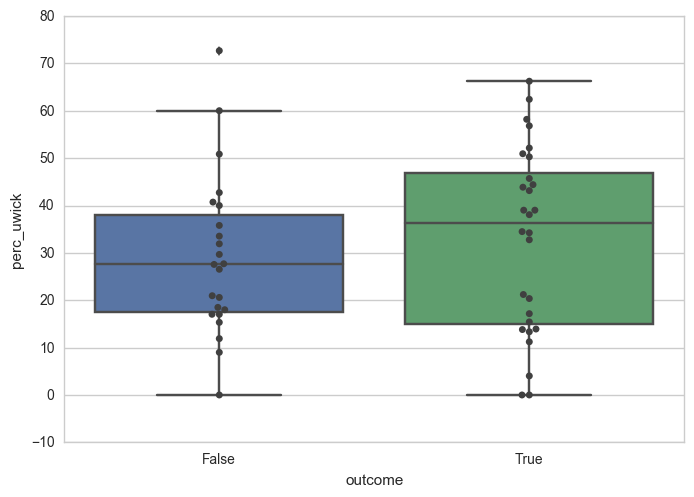

In [335]:
dfList = df_bullish['[perc_uwick:perc_body:perc_lwick]p1'].tolist()

perc_uwick=[l.split(':')[0] for l in dfList]
perc_uwick=([float(s.strip('[')) for s in perc_uwick])
df_bullish['perc_uwick']=perc_uwick

ax = sns.boxplot(x="outcome", y="perc_uwick", data=df_bullish)
ax = sns.swarmplot(x="outcome", y="perc_uwick", data=df_bullish, color=".25")

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
true_uwick=df_bullish.loc[df_bullish['outcome'] == True,'perc_uwick']
false_uwick=df_bullish.loc[df_bullish['outcome'] == False,'perc_uwick']
print("Avg perc of uwick for True set: %f" % true_uwick.mean())
print("Avg perc of uwick for False set: %f" % false_uwick.mean())
#performing paired t-test
stats.ttest_ind(a= true_uwick,b= false_uwick,equal_var=False)

## Bearish
### Lower_wick

Avg perc of lwick for True set: 26.572032
Avg perc of lwick for False set: 19.816449


/Users/ernesto/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Ttest_indResult(statistic=0.99679393353406431, pvalue=0.33685283347140782)

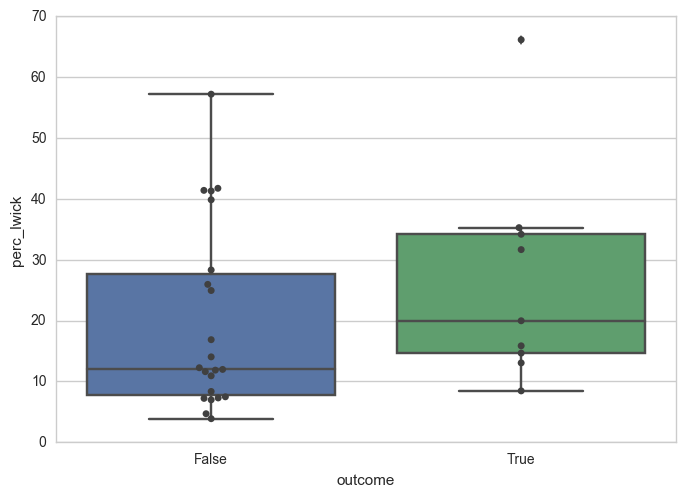

In [336]:
dfList = df_bearish['[perc_uwick:perc_body:perc_lwick]p1'].tolist()
perc_lwick=[l.split(':')[2] for l in dfList]
perc_lwick=([float(s.strip(']')) for s in perc_lwick])
df_bearish['perc_lwick']=perc_lwick

ax = sns.boxplot(x="outcome", y="perc_lwick", data=df_bearish)
ax = sns.swarmplot(x="outcome", y="perc_lwick", data=df_bearish, color=".25")

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
true_lwick=df_bearish.loc[df_bearish['outcome'] == True,'perc_lwick']
false_lwick=df_bearish.loc[df_bearish['outcome'] == False,'perc_lwick']
print("Avg perc of lwick for True set: %f" % true_lwick.mean())
print("Avg perc of lwick for False set: %f" % false_lwick.mean())
#performing paired t-test
stats.ttest_ind(a= true_lwick,b= false_lwick,equal_var=False)

### Conclusions
**Conclusion1** For Bullish entries, it seems that there is not significative correlation (P=0.4482) between perc of uwick candle and the outcome being successful.
**Conclusion2** For Bearish entries, it seems that there is not significative correlation (P=0.3368) between perc of lwick candle and the outcome being successful.

## Bullish+Bearish
### Body

Avg perc of body for True set: 41.658935
Avg perc of body for False set: 37.257195


Ttest_indResult(statistic=0.82143334128411549, pvalue=0.41390073506437952)

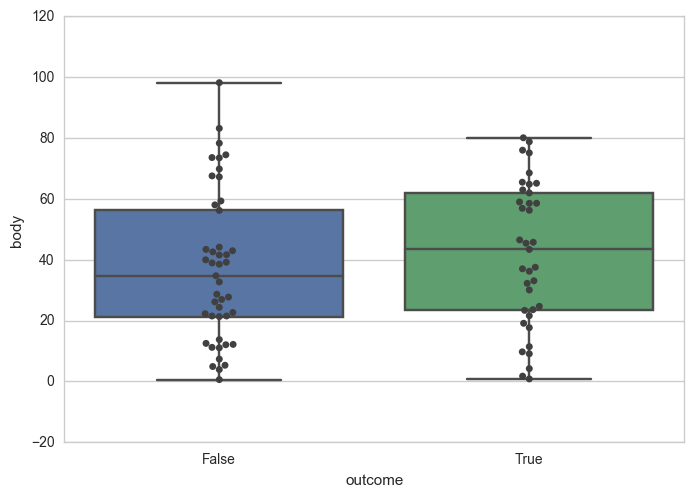

In [337]:
dfList = df['[perc_uwick:perc_body:perc_lwick]p1'].tolist()
body=[float(l.split(':')[1]) for l in dfList]
df['body']=body

ax = sns.boxplot(x="outcome", y="body", data=df)
ax = sns.swarmplot(x="outcome", y="body", data=df, color=".25")

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
true_body=df.loc[df['outcome'] == True,'body']
false_body=df.loc[df['outcome'] == False,'body']
print("Avg perc of body for True set: %f" % true_body.mean())
print("Avg perc of body for False set: %f" % false_body.mean())
#performing paired t-test
stats.ttest_ind(a= true_body,b= false_body,equal_var=False)


### Conclusions
**Conclusion1** It seems that there is not significative correlation (P=0.4139) between perc of body of the candle and the outcome being successful.

## Bullish
### Lower_wick

Avg perc of lwick for True set: 25.390814
Avg perc of lwick for False set: 35.753356


/Users/ernesto/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Ttest_indResult(statistic=-1.653836681414703, pvalue=0.10514852210847724)

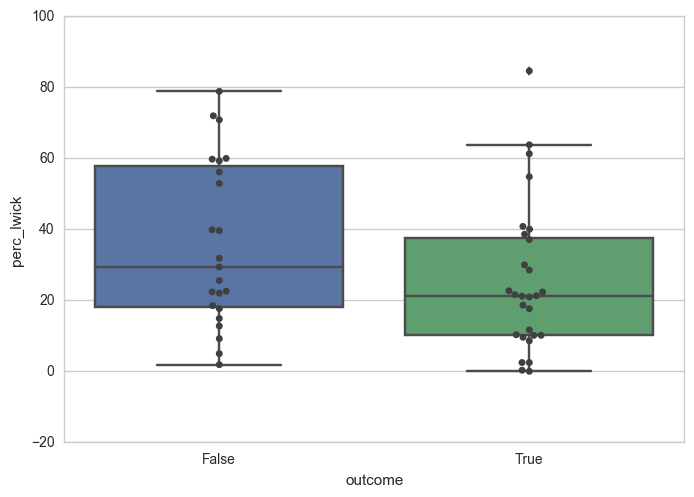

In [338]:
dfList = df_bullish['[perc_uwick:perc_body:perc_lwick]p1'].tolist()
perc_lwick=[l.split(':')[2] for l in dfList]
perc_lwick=([float(s.strip(']')) for s in perc_lwick])
df_bullish['perc_lwick']=perc_lwick

ax = sns.boxplot(x="outcome", y="perc_lwick", data=df_bullish)
ax = sns.swarmplot(x="outcome", y="perc_lwick", data=df_bullish, color=".25")

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
true_lwick=df_bullish.loc[df_bullish['outcome'] == True,'perc_lwick']
false_lwick=df_bullish.loc[df_bullish['outcome'] == False,'perc_lwick']
print("Avg perc of lwick for True set: %f" % true_lwick.mean())
print("Avg perc of lwick for False set: %f" % false_lwick.mean())
#performing paired t-test
stats.ttest_ind(a= true_lwick,b= false_lwick,equal_var=False)

## Bearish
### Upper_wick

/Users/ernesto/bin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Avg perc of uwick for True set: 31.800945
Avg perc of uwick for False set: 40.774267


Ttest_indResult(statistic=-0.98101024844137186, pvalue=0.34540338372683088)

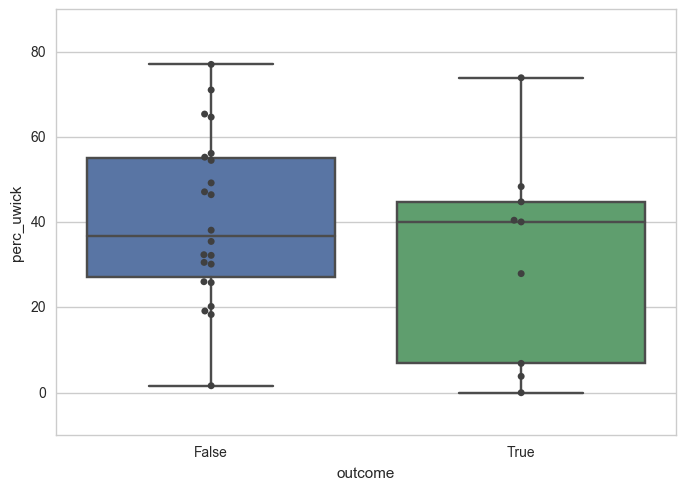

In [339]:
dfList = df_bearish['[perc_uwick:perc_body:perc_lwick]p1'].tolist()
perc_uwick=[l.split(':')[0] for l in dfList]
perc_uwick=([float(s.strip('[')) for s in perc_uwick])
df_bearish['perc_uwick']=perc_uwick

ax = sns.boxplot(x="outcome", y="perc_uwick", data=df_bearish)
ax = sns.swarmplot(x="outcome", y="perc_uwick", data=df_bearish, color=".25")

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
true_uwick=df_bearish.loc[df_bearish['outcome'] == True,'perc_uwick']
false_uwick=df_bearish.loc[df_bearish['outcome'] == False,'perc_uwick']
print("Avg perc of uwick for True set: %f" % true_uwick.mean())
print("Avg perc of uwick for False set: %f" % false_uwick.mean())
#performing paired t-test
stats.ttest_ind(a= true_uwick,b= false_uwick,equal_var=False)

### Conclusions
**Conclusion1** For Bullish entries, it seems that there is not significative correlation (P=0.1051) between perc of lwick candle and the outcome being successful.
**Conclusion2** For Bearish entries, it seems that there is not significative correlation (P=0.3454) between perc of uwick candle and the outcome being successful.

# Volume analysis

In the data matrix there are 2 variables that are related to the Volume

## Avg volume pre IC

Avg volume for True set: 27272.459459
Avg volume for False set: 21876.600222


Ttest_indResult(statistic=1.2207177905469311, pvalue=0.22642042552488068)

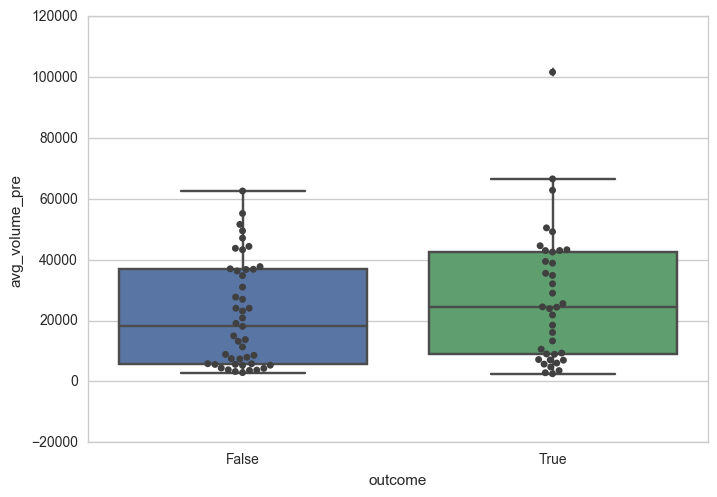

In [340]:
ax = sns.boxplot(x="outcome", y="avg_volume_pre", data=df)
ax = sns.swarmplot(x="outcome", y="avg_volume_pre", data=df, color=".25")

#getting the 2 series, one with differences for outcome=True and the other with outcome=False
true_volume=df.loc[df['outcome'] == True,'avg_volume_pre']
false_volume=df.loc[df['outcome'] == False,'avg_volume_pre']
print("Avg volume for True set: %f" % true_volume.mean())
print("Avg volume for False set: %f" % false_volume.mean())
#performing paired t-test
stats.ttest_ind(a= true_volume,b= false_volume,equal_var=False)

## m1,ic,p1 volumes

volumepre[m1,ic]: volume for IC-1,IC
volumepost[ic,p1]: volume for IC,IC+1

<type 'numpy.ndarray'>


TypeError: cannot perform reduce with flexible type

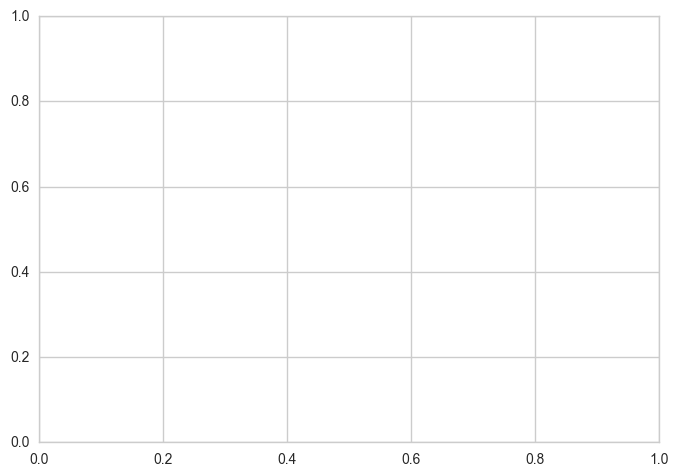

In [346]:
dfList1 = df['volume_pre_[m1,ic]'].tolist()
dfList2 = df['volume_post_[ic,p1]'].tolist()

data=[]
v_m1=np.array([l.split(',')[0] for l in dfList1])
v_ic=np.array([l.split(',')[1] for l in dfList1])
v_p1=np.array([l.split(',')[1] for l in dfList2])
print(type(v_m1))
data=[v_m1,v_ic,v_p1]

plt.boxplot(v_m1)
'''
plt.boxplot(data)
'''